In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# 'cs231n' folder containing the '.py', 'classifiers' and 'datasets'
# folders.
# e.g. 'cs231n/assignments/assignment1/cs231n/'
FOLDERNAME = 'cs231n/assignments/assignment1/cs231n/'

assert FOLDERNAME is not None, "[!] Enter the foldername."

%cd drive/My\ Drive
%cp -r $FOLDERNAME ../../
%cd ../../
%cd cs231n/datasets/
!bash get_datasets.sh
%cd ../../

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive
/content
/content/cs231n/datasets
--2020-06-13 17:12:49--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>

# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [ ]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [ ]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [ ]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [ ]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7963408538435033e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [ ]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 4.447615e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.017149607938732093


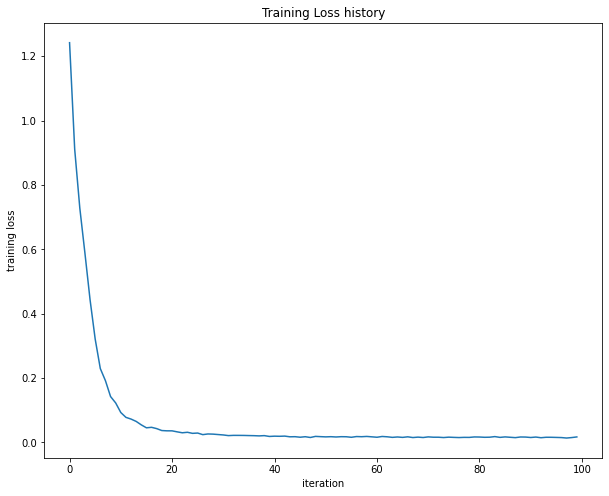

In [ ]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

In [ ]:
#And the training accuracy for this toy example
( net.predict(X) == y ).mean()

1.0

As it should be, we have been able to overfit a very small training set, obtaining a very small loss and 100% of accuracy. (Needless to say this will generalize very badly to new data.)

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [ ]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [ ]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


Epoch number 0, loss: 2.302965, W1 and W2 update ratios: 0.000425, 0.006522 
Epoch number 1, loss: 2.285452, W1 and W2 update ratios: 0.003620, 0.012593 
Epoch number 2, loss: 2.155228, W1 and W2 update ratios: 0.004003, 0.005100 
Epoch number 3, loss: 2.031796, W1 and W2 update ratios: 0.004620, 0.004220 
Epoch number 4, loss: 1.969481, W1 and W2 update ratios: 0.004309, 0.003495 
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

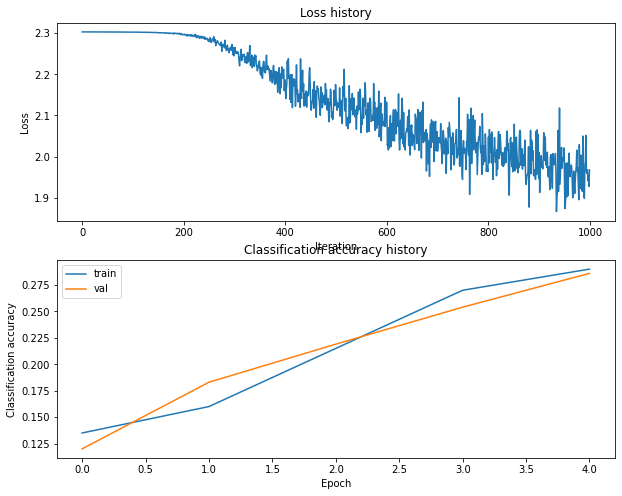

In [ ]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

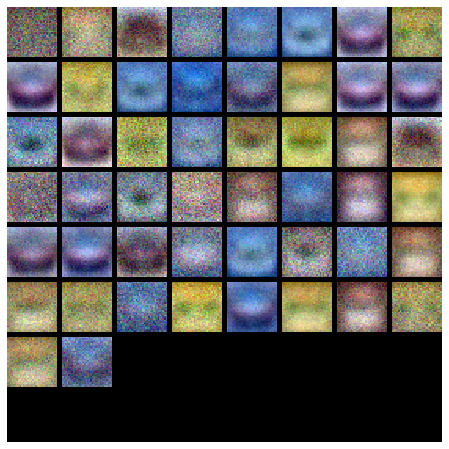

In [ ]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, number of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free to implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$ Let us start by increasing the learning rate, keeping the rest of parameters fixed; we want to make the loss history curve resemble that of an inverted exponential, as opposed to a line as it currently is. The best results are obtained with learning rates just slighly below 1e-3. The loss curve now has pretty much the desired shape and for now we move to the next parameter.

With the new rate, the gap between training and validation accuracy has increased towards the end of training, i.e. the training accuracy has kept improving while the validation accuracy hasn't. This may be a sign of overfitting, what means probably our regularization parameter is too low. We will take its current value as a rough lower limit for the range we're going to be picking from in our sampling. Slightly better results are obtained and now the curves are back again close to each other. This last fact suggests the right move now is to increase the model capacity. 

To assess performance as H increases we will plot the best acuracy results obtained against H (i.e. those results with the lr and reg pair which gave highest accuracy at a certain H, against every H). Tiny gains have been observed when increasing H from 50 to 100 (the overall trend is towards improving but almost insignificantly), so H has been increased now up to 210, and gains are more evident. The mentioned curve looks still very bumpy; the best results among the best performing (lr,reg) pairs are obtained for H=110, to then worsen for a bit and recover towards H=210. We will explore a bit more over this upper limit to find out if this improving trend is maintained for higher H>210. 

We have not obtained better results in our experiments with higher H, so we will settle for now with one of the two best H. Since the training accuracy vs epoch curve still has somewhat of a steep slope around the end, we pick this H and plan for an increase in the epoch number to exploit that apparent ponential. Before that, we readjust the lr and reg range limits to narrow the search around the best-performing area of the 2D graphs. The maximum validation accuracy obtained in these last series of trials has been 52.3%

No we'll focus on epoch number and learning rate decay. There have been issues in trying to reproduce the same results obtained in that most successful trial (though sporadically it's been matched and surpassed), even setting all parameters back to the same; this probably means the initialization method for the weights is not robust, leading to an inconsistent training process.

In doing the increase in epoch number, the performance sometimes has not improved and has come down even below 50%. This is due to continuing the iterations when we were actually very close to the loss minimum in the former best case; it is observed that the loss bounces back and forth around the seeked minimum, towards the end of the iterations. By sheer experimentation (and quite a bit of luck), it has been found that running the training process twice, tuning down the learning rate decay for the second run, the best results among all so far are achieved. Obviously the reason for this must be in such learning rate application scheme, as the second run is nothing but a continuation of the process which was terminated in the first run. The number of epochs for the second run has been later modified as well after having observed its accuracy history curve, and taken to be about one epoch lower.

With this combination of a first pass with a certain rate, and a second one with a slower rate, we've managed to hit a very low value for the loss and a validation accuracy of 54.2%. The test accuracy is even better than that of the validation set, at 54.6%.

**Note a posteriori:** After having studied lecture 6, we now know that as much high capacity as the computing resources allow is desired, counteracting the resulting overfitting effect with higher regularization. (As explained there, this is in order to have a loss function which has many good minima that are easy to converge to, as opposed to many bad minima which are easy to get trapped into.) So there was no actual point in the comparisons against H.

In [ ]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

trials = 12 # Number of trials for every hidden size

input_size = 32*32*3
#hidden_sizes = np.linspace(210, 290, 5, dtype=int)
hidden_sizes = [110] # We pick this one

lr_choices = np.logspace(-3.1, -2.88, 1000)
learning_rates = np.random.choice(lr_choices, size=trials, replace=True)

reg_choices = np.logspace(-1, -0.4, 1000)
regularization_strengths = np.random.choice(reg_choices, size=trials, replace=True)

results = {}
nets = {}
best_pairs = {}
best_nets = {}
for H in hidden_sizes:
  results[H] = {}
  nets[H] ={}
  print('Size of the hidden layer:', H)
  print('*****************************')
  for lr, reg in zip(learning_rates,regularization_strengths):
    print('lr: %f, reg: %f' % (lr,reg)) 
    net = TwoLayerNet(input_size=input_size, hidden_size=H, output_size=num_classes)
    stats = net.train(X_train, y_train, X_val, y_val, num_iters=1750, batch_size=200,
                      learning_rate = lr,learning_rate_decay=0.95, reg=reg, verbose=True)
    train_acc = np.mean( net.predict(X_train) == y_train )
    val_acc = np.mean( net.predict(X_val) == y_val )
    results[H][(lr,reg)] = (train_acc, val_acc)
    nets[H][(lr,reg)] = (net, stats)
    print('Train accuracy: %f, val accuracy: %f' % (train_acc, val_acc))


  best_pairs[H] = max( results[H].items(), key= lambda item: item[1][1] )[0]
  best_nets[H] = nets[H][ best_pairs[H] ][0]

best_H = hidden_sizes[ np.argmax( [ max(results[H].items(), key= lambda item: item[1][1])[1][1] for H in hidden_sizes ] ) ]
best_lr = best_pairs[ best_H ][0]
best_reg = best_pairs[ best_H ][1]
best_net = best_nets[ best_H ]

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

Size of the hidden layer: 110
*****************************
lr: 0.001145, reg: 0.169133
Epoch number 0, loss: 2.303146, W1 and W2 update ratios: 0.004931, 0.085211 
Epoch number 1, loss: 1.777241, W1 and W2 update ratios: 0.048644, 0.036296 
Epoch number 2, loss: 1.649546, W1 and W2 update ratios: 0.047803, 0.025372 
Epoch number 3, loss: 1.454191, W1 and W2 update ratios: 0.031397, 0.022237 
Epoch number 4, loss: 1.487057, W1 and W2 update ratios: 0.032503, 0.021453 
Epoch number 5, loss: 1.487216, W1 and W2 update ratios: 0.028786, 0.015912 
Epoch number 6, loss: 1.209359, W1 and W2 update ratios: 0.022998, 0.016723 
Epoch number 7, loss: 1.310669, W1 and W2 update ratios: 0.024165, 0.014812 
Train accuracy: 0.554653, val accuracy: 0.504000
lr: 0.000856, reg: 0.166349
Epoch number 0, loss: 2.303144, W1 and W2 update ratios: 0.003431, 0.055525 
Epoch number 1, loss: 1.823857, W1 and W2 update ratios: 0.034949, 0.021763 
Epoch number 2, loss: 1.653952, W1 and W2 update ratios: 0.033020

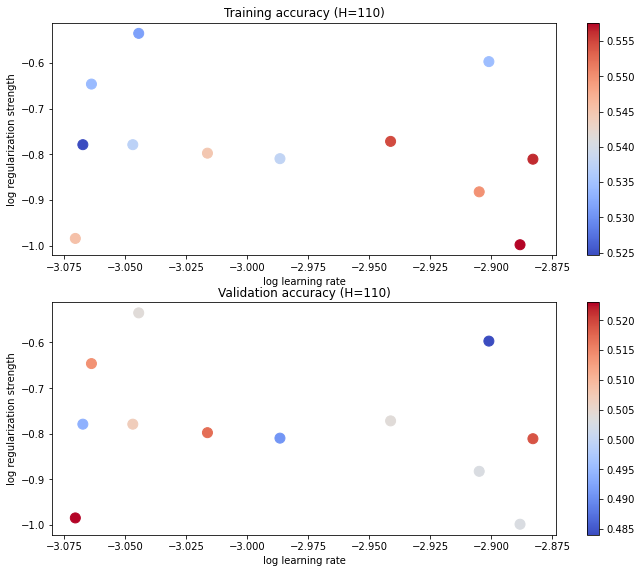

In [ ]:
# Visualize the results in the plane defined by lr and reg, for every H

import math
import pdb

# pdb.set_trace()

for H in hidden_sizes:
  x_scatter = [math.log10(x[0]) for x in results[H]]
  y_scatter = [math.log10(x[1]) for x in results[H]]

  # plot training accuracy
  marker_size = 100
  colors = [results[H][x][0] for x in results[H]]
  plt.subplot(2, 1, 1)
  plt.tight_layout(pad=3)
  plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap=plt.cm.coolwarm)
  plt.colorbar()
  plt.xlabel('log learning rate')
  plt.ylabel('log regularization strength')
  plt.title('Training accuracy (H=%d)' % (H))


  # plot validation accuracy
  colors = [results[H][x][1] for x in results[H]] # default size of markers is 20
  plt.subplot(2, 1, 2)
  plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap=plt.cm.coolwarm)
  plt.colorbar()
  plt.xlabel('log learning rate')
  plt.ylabel('log regularization strength')
  plt.title('Validation accuracy (H=%d)' % (H))
  plt.show()

In [ ]:
# Plots of the accuracy for each of the (lr,reg) pairs tried, versus H
for lr,reg in zip(learning_rates,regularization_strengths):
  plt.subplot(2, 1, 2)
  training_accuracies = [results[H][lr,reg][0] for H in hidden_sizes]
  validation_accuracies = [results[H][lr,reg][1] for H in hidden_sizes]
  plt.plot(training_accuracies, label='train')
  plt.plot(validation_accuracies, label='val')
  plt.title('Training and validation accuracies versus hidden layer size (lr= %f, reg= %f)' % (lr,reg))
  plt.xlabel('H')
  plt.ylabel('Classification accuracy')
  plt.legend()
  plt.show()

In [ ]:
# Plot the best results obtained for every H
plt.subplot(2, 1, 2)
best_val_accuracies = [results[H][ best_pairs[H] ][1] for H in hidden_sizes]
plt.plot(best_val_accuracies)
plt.title('Highest validation accuracies obtained for every hidden layer size')
plt.xlabel('H') 
plt.ylabel('Highest validation accuracy')
plt.show()

In [ ]:
# Plot the loss function and train / validation accuracies
for H in hidden_sizes:
  stats = nets[H][ best_pairs[H] ][1]

  plt.subplot(2, 1, 1)
  plt.plot(stats['loss_history'])
  plt.title('Loss history for the best lr and reg pair (lr=%f, reg=%f) obtained with H = %d' % (best_pairs[H][0],best_pairs[H][1], H))

  plt.xlabel('Iteration')
  plt.ylabel('Loss')

  plt.subplot(2, 1, 2)
  plt.plot(stats['train_acc_history'], label='train')
  plt.plot(stats['val_acc_history'], label='val')
  plt.title('Classification accuracy history for the best lr and reg pair (%f, %f) obtained with H = %d' % (best_pairs[H][0],best_pairs[H][1], H))
  plt.xlabel('Epoch')
  plt.ylabel('Classification accuracy')
  plt.legend()
  plt.show()

In [ ]:
# We will now retrain the network that has given the best results, with a higher number of epochs and a learning
# rate tweaked accordingly

best_net = TwoLayerNet(input_size=input_size, hidden_size=best_H, output_size=num_classes)

# 1st training pass: learning_rate_decay set to 0.95
stats1 = best_net.train(X_train, y_train, X_val, y_val, num_iters=2250, batch_size=200,
                  learning_rate = best_lr,learning_rate_decay=0.95, reg=best_reg, verbose=True)
train_acc = np.mean( best_net.predict(X_train) == y_train )
val_acc = np.mean( best_net.predict(X_val) == y_val )
print('Train accuracy after first pass: %f, val accuracy: %f \n' % (train_acc, val_acc))

# 2nd training pass: learning_rate_decay set to 0.90; 980 iters correspond to 4 epochs
stats2 = best_net.train(X_train, y_train, X_val, y_val, num_iters=2000, batch_size=200,
                       learning_rate = best_lr,learning_rate_decay=0.90, reg=best_reg, verbose=True)
train_acc = np.mean( best_net.predict(X_train) == y_train )
val_acc = np.mean( best_net.predict(X_val) == y_val )
print('Train accuracy after second pass: %f, val accuracy: %f' % (train_acc, val_acc))

Epoch number 0, loss: 2.302897, W1 and W2 update ratios: 0.003336, 0.059861 
Epoch number 1, loss: 1.728603, W1 and W2 update ratios: 0.032663, 0.024662 
Epoch number 2, loss: 1.652994, W1 and W2 update ratios: 0.034006, 0.020928 
Epoch number 3, loss: 1.536703, W1 and W2 update ratios: 0.032019, 0.017786 
Epoch number 4, loss: 1.435730, W1 and W2 update ratios: 0.024015, 0.013115 
Epoch number 5, loss: 1.457464, W1 and W2 update ratios: 0.024992, 0.015009 
Epoch number 6, loss: 1.372548, W1 and W2 update ratios: 0.018855, 0.010517 
Epoch number 7, loss: 1.475122, W1 and W2 update ratios: 0.023882, 0.011780 
Epoch number 8, loss: 1.105611, W1 and W2 update ratios: 0.016851, 0.008477 
Epoch number 9, loss: 1.262003, W1 and W2 update ratios: 0.016386, 0.008227 
Train accuracy after first pass: 0.561551, val accuracy: 0.536000 

Epoch number 0, loss: 1.269667, W1 and W2 update ratios: 0.026292, 0.014625 
Epoch number 1, loss: 1.436087, W1 and W2 update ratios: 0.032361, 0.016854 
Epoch nu

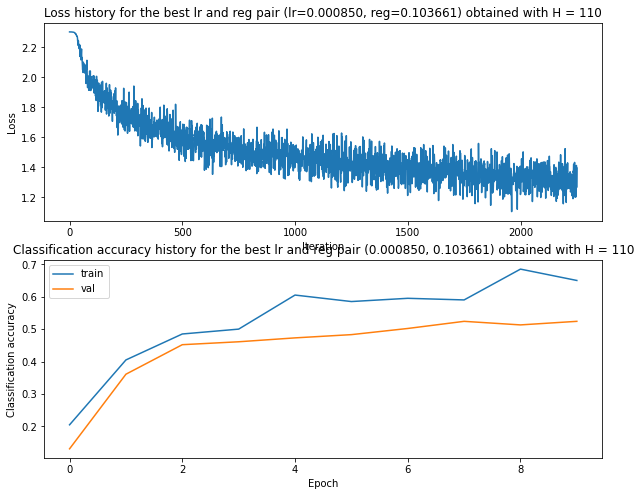

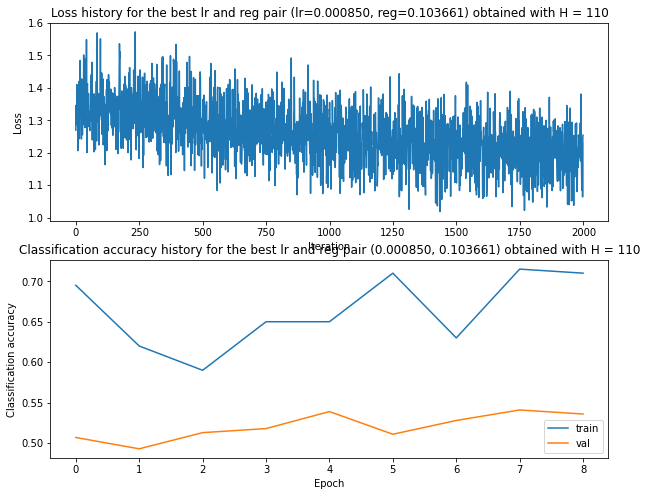

In [ ]:
# Stats for the two training passes
for stats in [stats1, stats2]:
  plt.subplot(2, 1, 1)
  plt.plot(stats['loss_history'])
  plt.title('Loss history for the best lr and reg pair (lr=%f, reg=%f) obtained with H = %d' % (best_pairs[H][0],best_pairs[H][1], H))

  plt.xlabel('Iteration')
  plt.ylabel('Loss')

  plt.subplot(2, 1, 2)
  plt.plot(stats['train_acc_history'], label='train')
  plt.plot(stats['val_acc_history'], label='val')
  plt.title('Classification accuracy history for the best lr and reg pair (%f, %f) obtained with H = %d' % (best_pairs[H][0],best_pairs[H][1], H))
  plt.xlabel('Epoch')
  plt.ylabel('Classification accuracy')
  plt.legend()
  plt.show()

In [ ]:
# Print your validation accuracy: this should be above 48%
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

Validation accuracy:  0.543


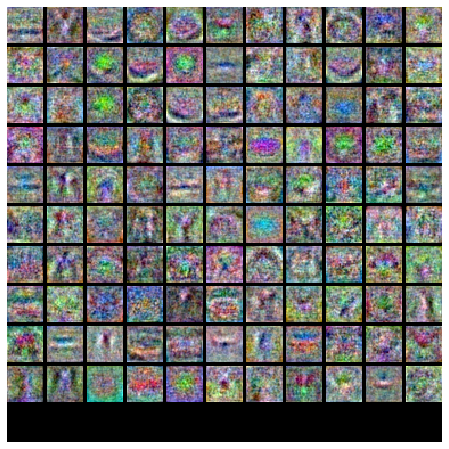

In [ ]:
# Visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [ ]:
# Print your test accuracy: this should be above 48%
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.546


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$ 1 and 3.

$\color{blue}{\textit Your Explanation:}$
1. Training on a larger dataset makes it more difficult for the model to fit it, since there are more instances it must accommodate to. This can also increase the testing accuracy since the model has more information of the real outer world.
2. Adding more hidden units makes the model more able to accommodate the training data, and therefore the chances of overfitting increase. It may increase the testing accuracy as well though, if the gap is not way too high, so we can benefit from that and find a balance.

3. Increasing the regularization strength prevents the weights from being too complicated (e.g. L2 regularization tends to make them smaller and more even, since higher components are penalized higher due to the nature of the square function) and therefore prevents the model from being contorted enough to be able to detailedly fit the training points, what would translate in poor performance when points other than those are fed. Thus regularization tends to close the gap.



---
# IMPORTANT

This is the end of this question. Please do the following:

1. Click `File -> Save` to make sure the latest checkpoint of this notebook is saved to your Drive.
2. Execute the cell below to download the modified `.py` files back to your drive.

In [ ]:
import os

FOLDER_TO_SAVE = os.path.join('drive/My Drive/', FOLDERNAME)
FILES_TO_SAVE = ['cs231n/classifiers/neural_net.py']

for files in FILES_TO_SAVE:
  with open(os.path.join(FOLDER_TO_SAVE, '/'.join(files.split('/')[1:])), 'w') as f:
    f.write(''.join(open(files).readlines()))